In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_fuel_consumption = pd.read_csv('Fuel Consumption and Cost.csv')

#EDA

In [ ]:
#Showing first 5 rows
df_fuel_consumption.head()

,AIRCRAFT,DATE,REGION/OPERATING GROUP,CITY OF PURCHASE,FUEL CO.,METHOD OF PAYMENT,TOTAL LITRES,PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $),EXTENDED COST (CAD $)
0,GXS,10/7/2019,"MOUNT HOPE, ON",HAMILTON,WORLD FUELS,NSO,704.0,1.094957,770.85
1,GXS,10/8/2019,"MOUNT HOPE, ON",HAMILTON,WORLD FUELS,NSO,615.0,1.077447,662.63
2,GXL,10/8/2019,"MOUNT HOPE, ON",HAMILTON,WORLD FUELS,NSO,440.0,1.077455,474.08
3,GXS,10/8/2019,"MOUNT HOPE, ON",THUNDER BAY,SHELL,NSO,691.1,0.955086,660.06
4,GXL,10/9/2019,"MOUNT HOPE, ON",SAULT STE. MARIE,AVJET,NSO,584.0,1.098682,641.63


In [ ]:
# Checking for missing values
print(df_fuel_consumption.isnull().sum())

AIRCRAFT                                                         0
DATE                                                             0
REGION/OPERATING GROUP                                           0
CITY OF PURCHASE                                                 0
FUEL CO.                                                         0
METHOD OF PAYMENT                                                0
TOTAL LITRES                                                     0
PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)    0
EXTENDED COST (CAD $)                                            0
dtype: int64


In [ ]:
# Statistical summary
df_fuel_consumption.describe()

,TOTAL LITRES,PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $),EXTENDED COST (CAD $)
count,406.000000,406.000000,406.000000
mean,1284.441732,1.228773,1451.211486
std,1806.221287,0.385935,2122.945317
min,45.200000,0.727600,13.740000
25%,380.770000,0.949703,484.830000
50%,635.450000,1.048340,824.790000
75%,1412.975000,1.471018,1530.902500
max,18612.600000,2.561103,24689.610000


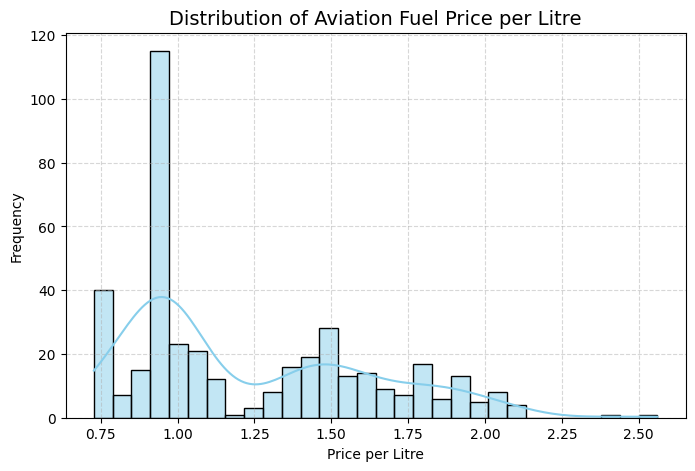

In [ ]:
# Histogram for Price per Litre
plt.figure(figsize=(8, 5))
sns.histplot(df_fuel_consumption['PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Aviation Fuel Price per Litre', fontsize=14)
plt.xlabel('Price per Litre')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

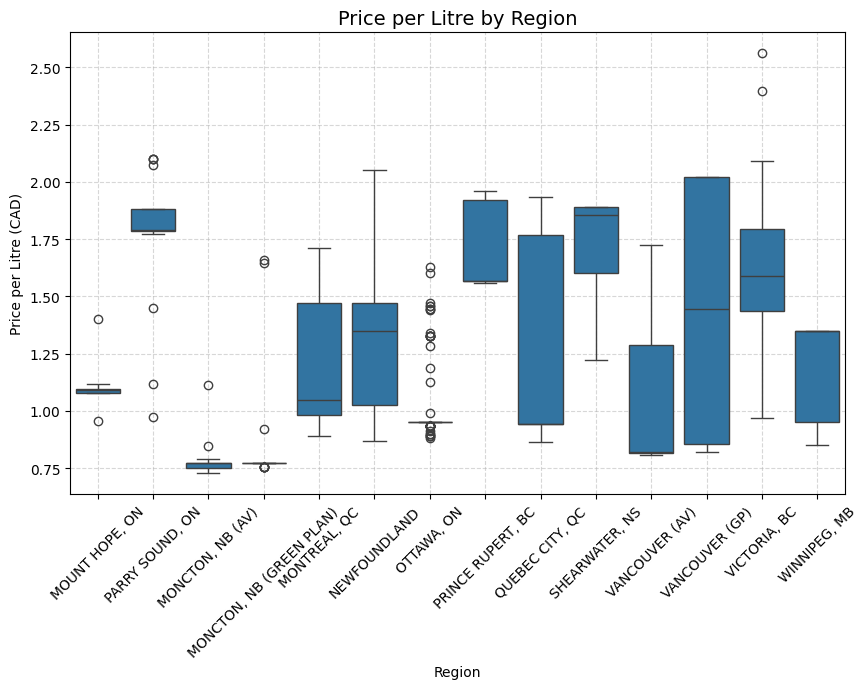

In [ ]:
#Boxplot of Price per Litre by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='REGION/OPERATING GROUP', y='PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)', data=df_fuel_consumption)
plt.title('Price per Litre by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Price per Litre (CAD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

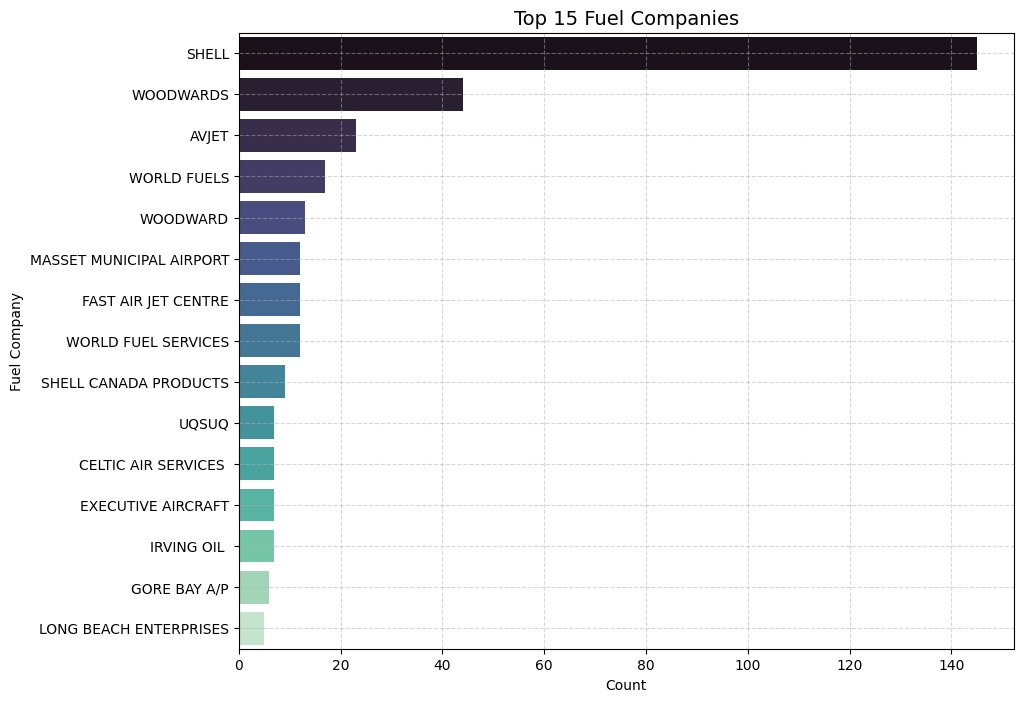

In [ ]:
#Bar Chart of Fuel Company Frequency
plt.figure(figsize=(10, 8))

top_suppliers = df_fuel_consumption['FUEL CO.'].value_counts().head(15)

sns.barplot(
    y=top_suppliers.index,
    x=top_suppliers.values,
    hue=top_suppliers.index,
    palette='mako',
    dodge=False,
    legend=False
)

plt.title('Top 15 Fuel Companies', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Fuel Company')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


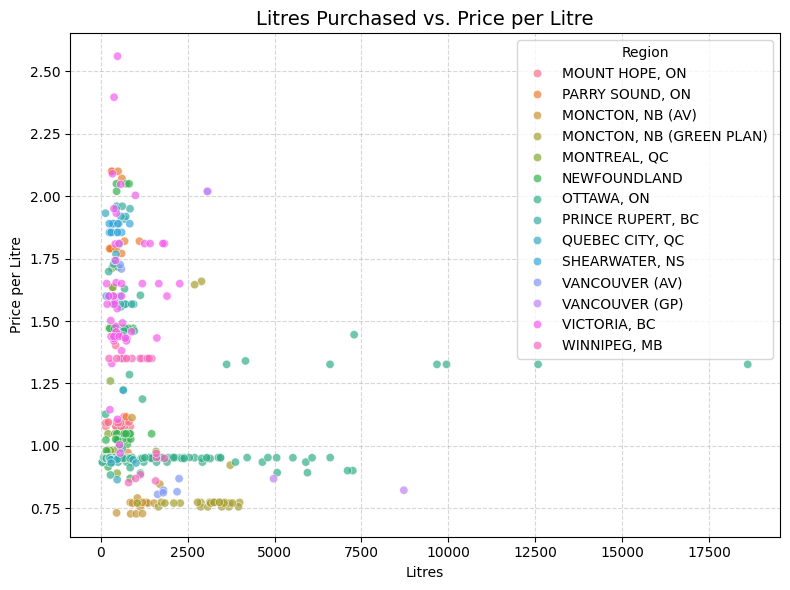

In [ ]:
#Scatterplot for Litres Purchased vs. Price per Litre
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_fuel_consumption, x='TOTAL LITRES', y='PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)', hue='REGION/OPERATING GROUP', alpha=0.7)
plt.title('Litres Purchased vs. Price per Litre', fontsize=14)
plt.xlabel('Litres')
plt.ylabel('Price per Litre')
plt.legend(title='Region')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

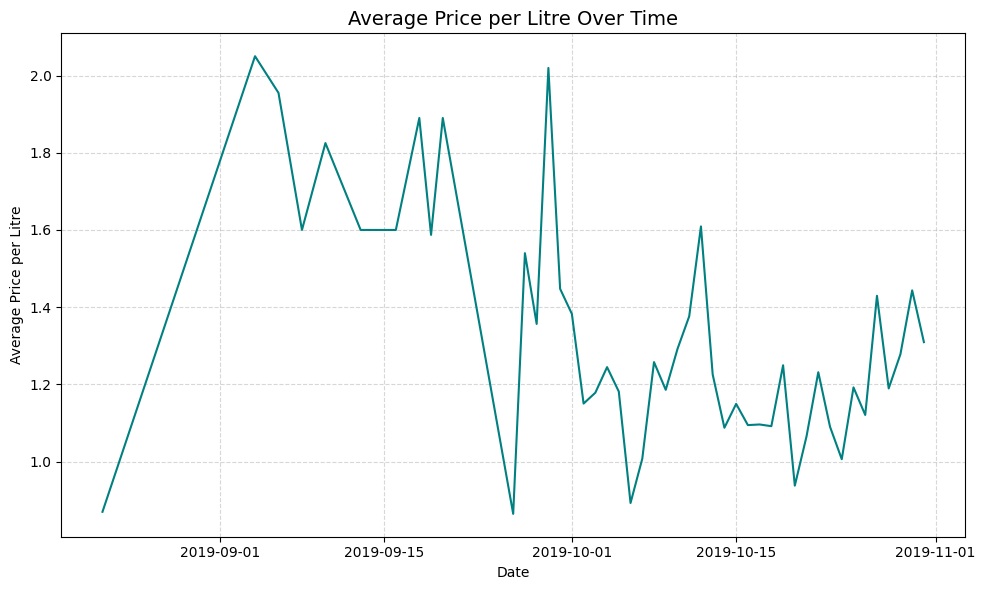

In [ ]:
# Making sure the Date column is datetime
df_fuel_consumption['DATE'] = pd.to_datetime(df_fuel_consumption['DATE'])

# Calculating average price per date
avg_price_time = df_fuel_consumption.groupby('DATE')['PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_time, x='DATE', y='PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)', color='teal')
plt.title('Average Price per Litre Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Price per Litre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


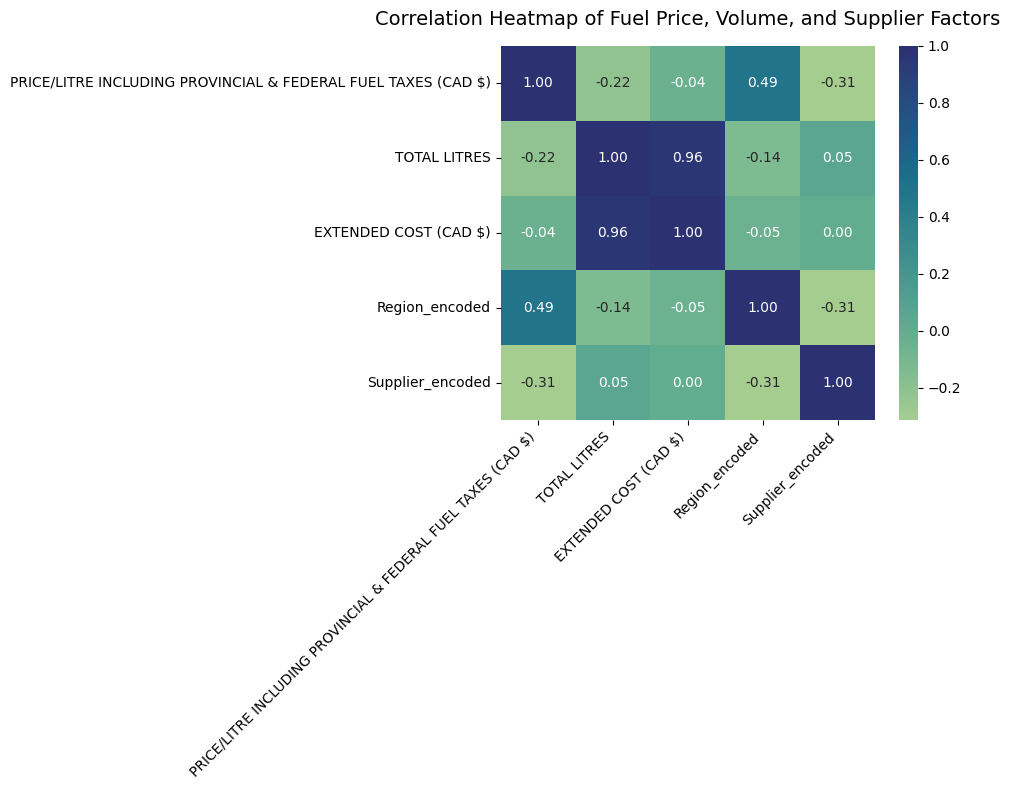

In [ ]:
# Encoding categorical columns
df_encoded = df_fuel_consumption.copy()
df_encoded['Region_encoded'] = df_encoded['REGION/OPERATING GROUP'].astype('category').cat.codes
df_encoded['Supplier_encoded'] = df_encoded['FUEL CO.'].astype('category').cat.codes

# Selecting only the relevant columns
corr_columns = [
    'PRICE/LITRE INCLUDING PROVINCIAL & FEDERAL FUEL TAXES (CAD $)',
    'TOTAL LITRES',
    'EXTENDED COST (CAD $)',
    'Region_encoded',
    'Supplier_encoded'
]

# Computing correlation matrix
corr_matrix = df_encoded[corr_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='crest',
    cbar=True,
    square=True,
    annot_kws={"size": 10}
)

# Rotating labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Correlation Heatmap of Fuel Price, Volume, and Supplier Factors', fontsize=14, pad=15)
plt.tight_layout()
plt.show()